### Score: `[53]`

Q1. `[15.5]` YOUR FINDINGS。

Q2. `[22]` good job。

Q3. `[15.5]` 5 different plots, 希望不同类型的统计图。

In [1]:
q1_path = '..\\Assignment_rd_common_files\\200301_202006-C3S-L3_GHG-PRODUCTS-OBS4MIPS-MERGED-v4.3.nc'
q2_path = '..\\Assignment_rd_common_files\\NOAA_NCDC_ERSST_v3b_SST.nc'

# 1. Global methane levels from 2002

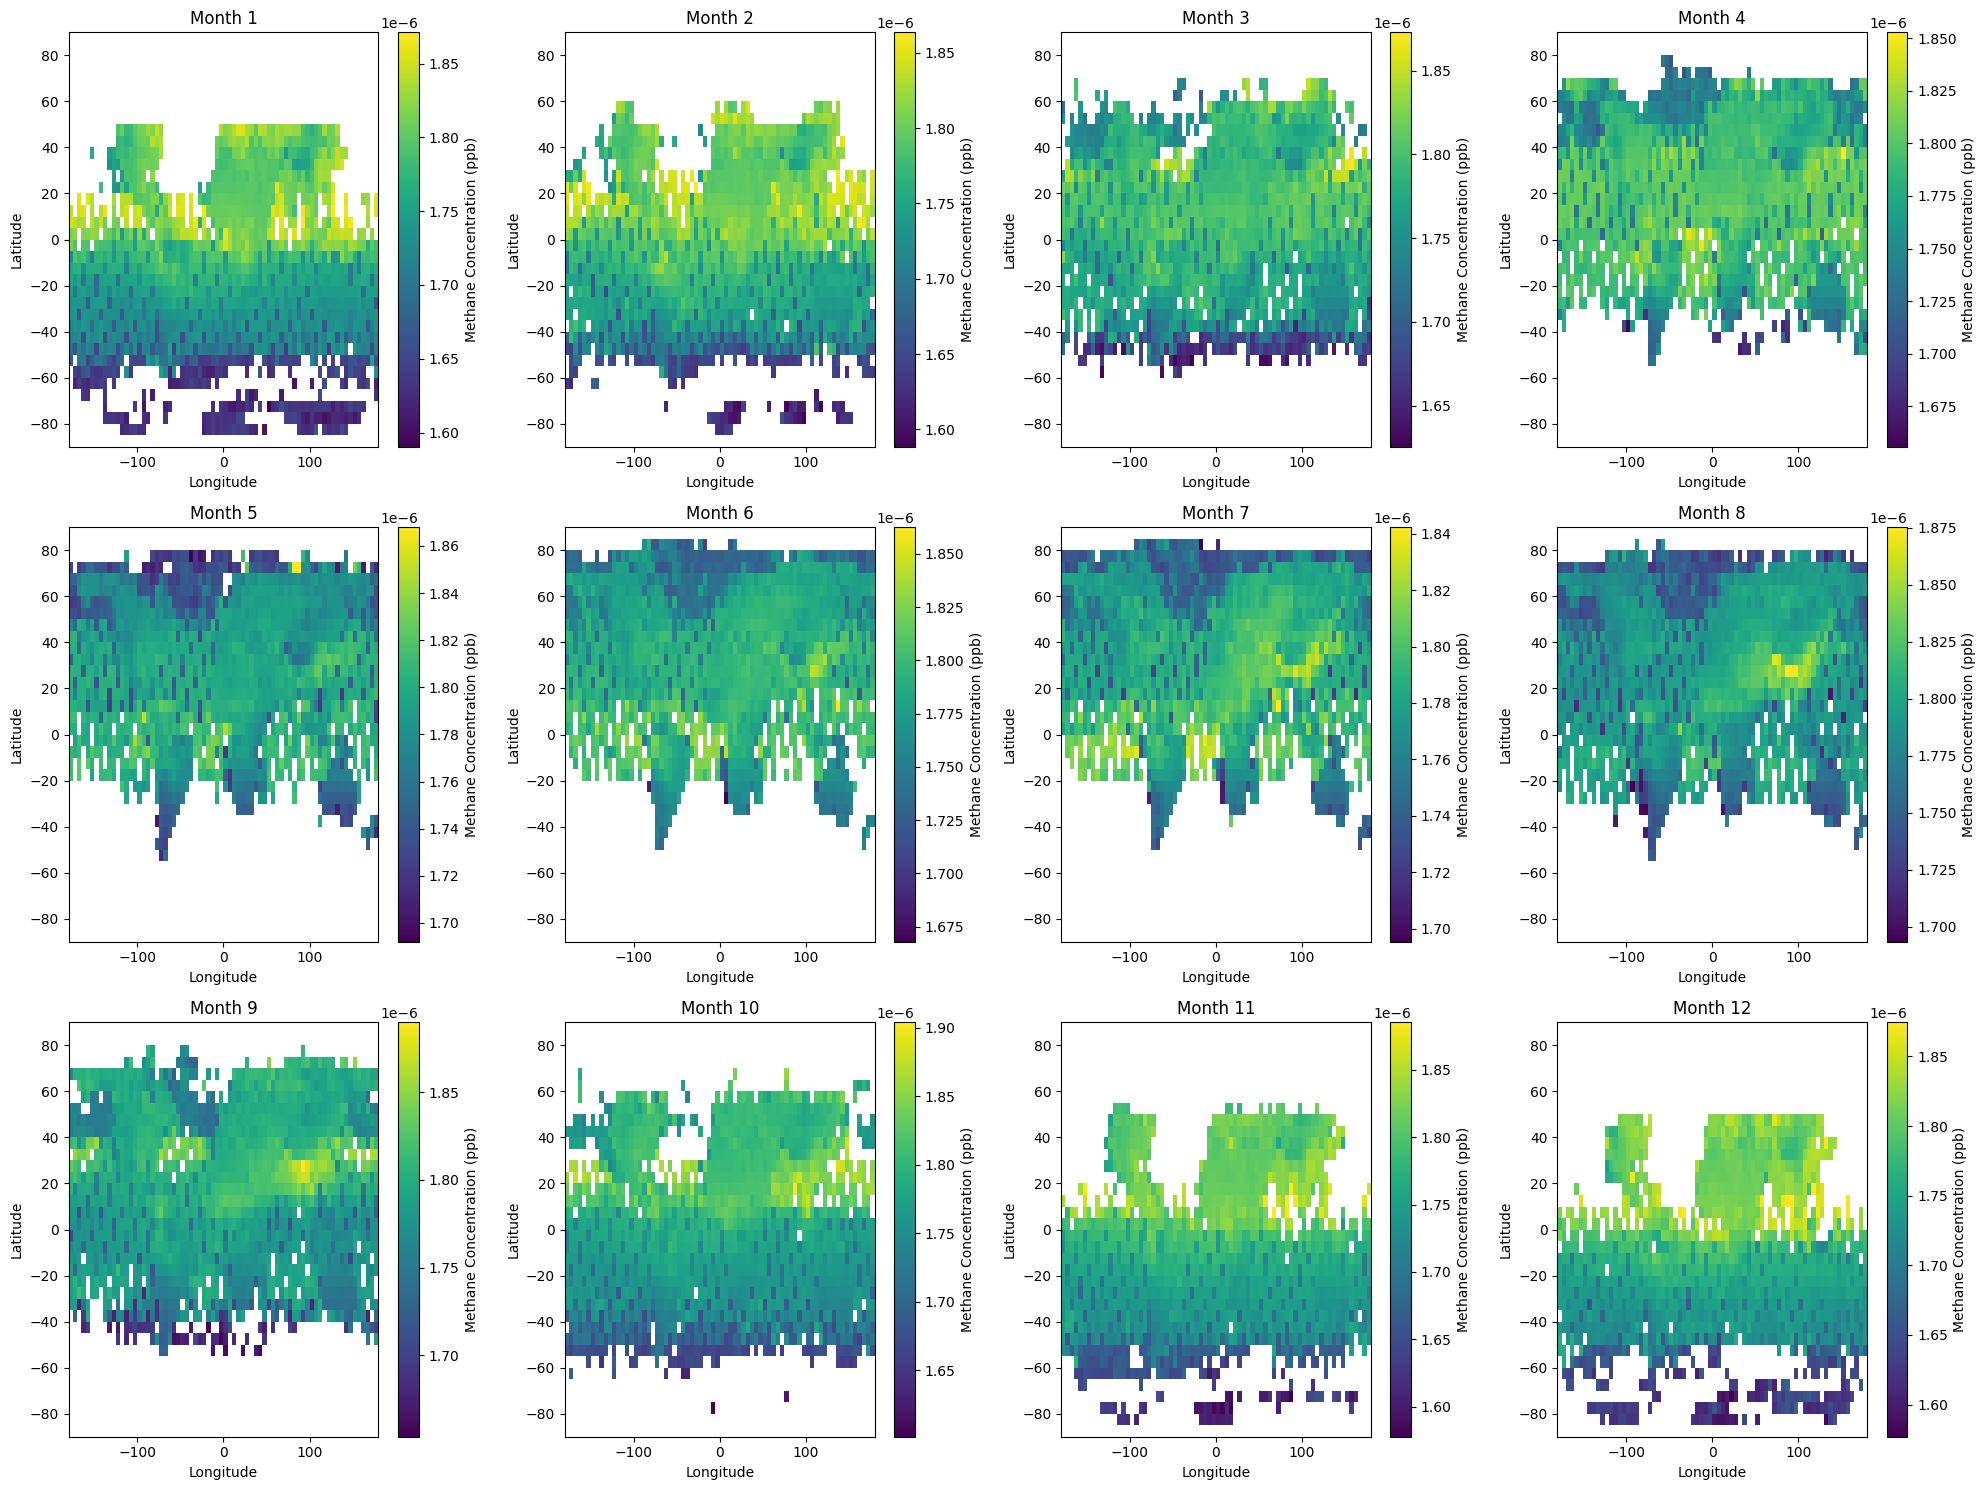

In [2]:
import xarray as xr  
import matplotlib.pyplot as plt  

# 读取netCDF文件  
ds = xr.open_dataset(q1_path)  

# 1.1 
# 提取甲烷浓度数据  
xch4 = ds.xch4  

# 计算每个月的平均值  
monthly_climatology = xch4.groupby('time.month').mean(dim='time')  

# 绘制每个月的甲烷气候学  
fig, axs = plt.subplots(3, 4, figsize=(20, 15))  
for i in range(12):  
    ax = axs[i // 4, i % 4]  
    monthly_climatology[i].plot(ax=ax, cmap='viridis', cbar_kwargs={'label': 'Methane Concentration (ppb)'})  
    ax.set_title(f'Month {i + 1}')  
    ax.set_xlabel('Longitude')  
    ax.set_ylabel('Latitude')  

plt.tight_layout()  
plt.show()

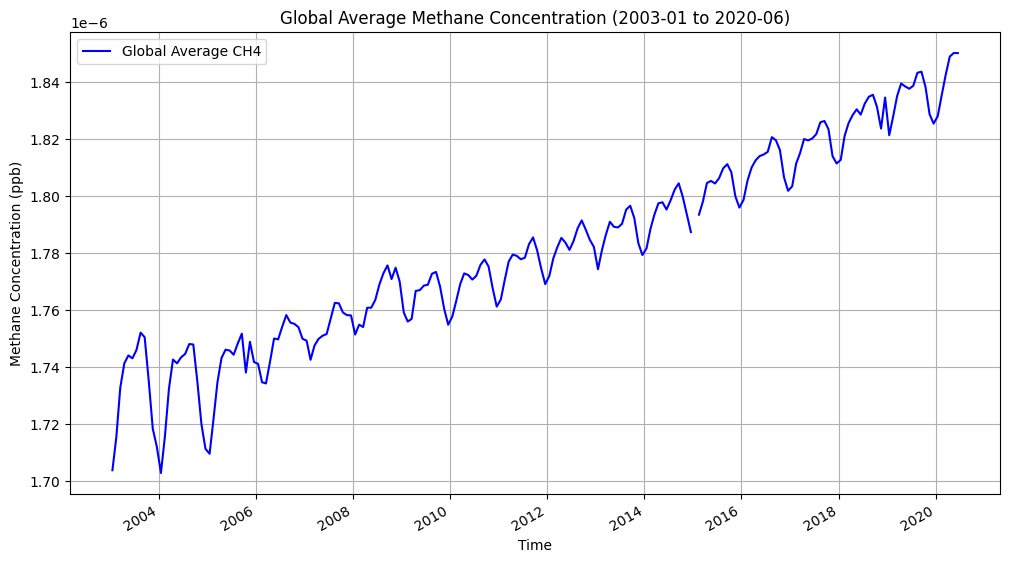

In [ ]:
# 1.2 
#计算全球平均甲烷浓度  
# NOTE: YOUR FINDINGS

global_mean_xch4 = xch4.mean(dim=('lat', 'lon'))  

# 绘制时间序列  
plt.figure(figsize=(12, 6))  
global_mean_xch4.plot(label='Global Average CH4', color='blue')  
plt.title('Global Average Methane Concentration (2003-01 to 2020-06)')  
plt.xlabel('Time')  
plt.ylabel('Methane Concentration (ppb)')  
plt.grid()  
plt.legend()  
plt.show()

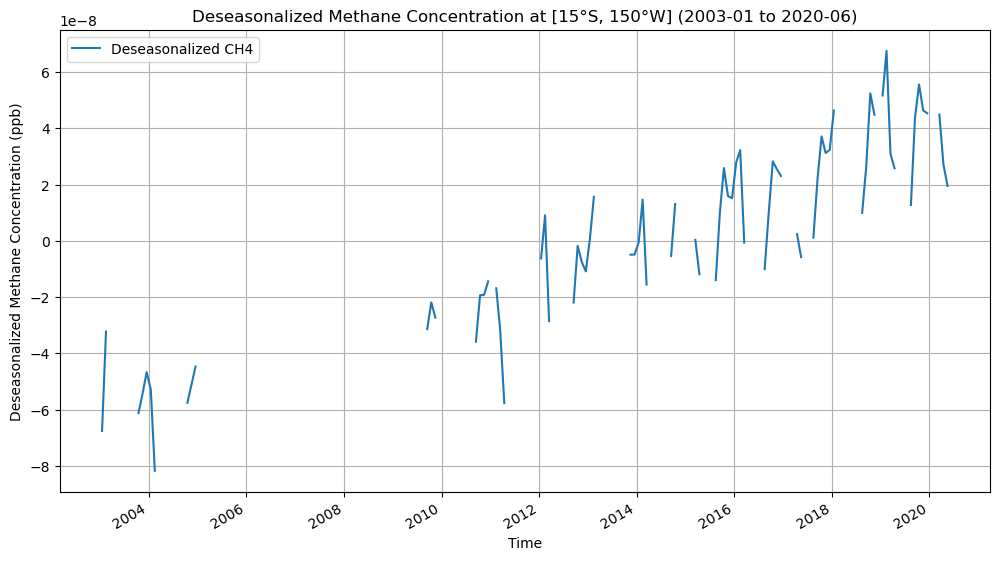

In [27]:
# 1.3
# 提取特定点的甲烷浓度  
point_xch4 = xch4.sel(lat=-15, lon=150, method='nearest')  

# 计算去季节化  
monthly_means = point_xch4.groupby('time.month').mean(dim='time')
deseasonalized = point_xch4.groupby('time.month') - monthly_means  

# 判别是否有有效数据  
if deseasonalized.count() > 0:  
    plt.figure(figsize=(12, 6))  
    deseasonalized.plot(label='Deseasonalized CH4')  
    plt.title('Deseasonalized Methane Concentration at [15°S, 150°W] (2003-01 to 2020-06)')  
    plt.xlabel('Time')  
    plt.ylabel('Deseasonalized Methane Concentration (ppb)')  
    plt.grid()  
    plt.legend()  
    plt.show()  
else:  
    print("去季节化结果没有有效数据。")

# 2. Niño 3.4 index

In [4]:
import xarray as xr  
import numpy as np  

# 读取 netCDF 文件  
ds = xr.open_dataset(q2_path)  

# 2.1
# 选择 Niño 3.4 区域的 SST 数据 
sst_nino34 = ds.sst.sel(lat=slice(-5, 5), lon=slice(190, 240))

# 计算每个月的气候平均值  
monthly_climatology = sst_nino34.groupby('time.month').mean('time')  

# 计算 SST 异常值  
sst_anomalies = sst_nino34.groupby('time.month') - monthly_climatology  

# 输出异常值  
print(sst_anomalies)

<xarray.DataArray 'sst' (time: 684, lat: 5, lon: 26)>
array([[[-0.43157768, -0.41846275, -0.39795303, ..., -0.2116642 ,
         -0.23776245, -0.24401474],
        [-0.41259003, -0.4067192 , -0.3875141 , ..., -0.52064896,
         -0.5346451 , -0.51997185],
        [-0.40932274, -0.39743805, -0.36237717, ..., -0.6373882 ,
         -0.6171951 , -0.583725  ],
        [-0.4140854 , -0.37909317, -0.3215618 , ..., -0.43292618,
         -0.38404274, -0.3352623 ],
        [-0.5043678 , -0.43894005, -0.3710251 , ..., -0.17453575,
         -0.11044502, -0.06918144]],

       [[-0.5374584 , -0.52739716, -0.50823593, ..., -0.40254593,
         -0.44382668, -0.45287704],
        [-0.55093956, -0.539135  , -0.51673317, ..., -0.6660595 ,
         -0.7127285 , -0.710968  ],
        [-0.61242104, -0.5959244 , -0.5572338 , ..., -0.7235069 ,
         -0.7326374 , -0.73106194],
        [-0.6798363 , -0.6483364 , -0.5889931 , ..., -0.5397434 ,
         -0.50793266, -0.49977684],
        [-0.7830448 , -0.7

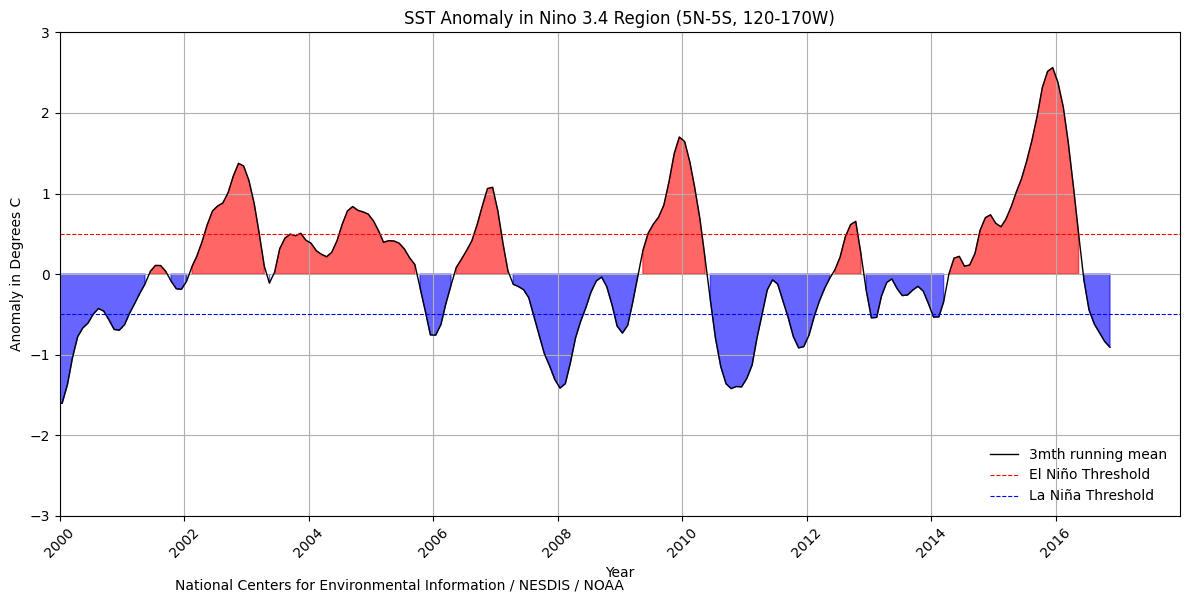

In [ ]:
# 2.2
# 计算 3 个月的滑动平均  
sst_anomalies_smooth = sst_anomalies.rolling(time=3, center=True).mean()  

# 计算平均值以获得一维数组  
sst_anomalies_smooth_mean = sst_anomalies_smooth.mean(dim=['lat', 'lon'])  

# 将 xarray 数组转换为 NumPy 数组以便绘图  
time_vals = sst_anomalies_smooth_mean['time'].values  
anomalies_vals = sst_anomalies_smooth_mean.values  

# 创建图形  
plt.figure(figsize=(12, 6))  

# 绘制异常值图  
plt.plot(time_vals, anomalies_vals, color='black', linewidth=1, label='3mth running mean')  

# 填充 El Niño 区域  
plt.fill_between(time_vals, anomalies_vals, where=(anomalies_vals > 0),   
                 color='red', alpha=0.6)  
# 填充 La Niña 区域  
plt.fill_between(time_vals, anomalies_vals, where=(anomalies_vals < 0),   
                 color='blue', alpha=0.6)  

# 添加阈值线  
plt.axhline(0.5, color='red', linewidth=0.8, linestyle='--', label='El Niño Threshold')  
plt.axhline(-0.5, color='blue', linewidth=0.8, linestyle='--', label='La Niña Threshold')  

# 设置横纵轴标签和范围  
plt.title('SST Anomaly in Nino 3.4 Region (5N-5S, 120-170W)')  
plt.xlabel('Year')  
plt.ylabel('Anomaly in Degrees C')  
plt.xlim([np.datetime64('2000-01-01'), np.datetime64('2017-12-31')])  # NOTE: 这个不用加吧
plt.ylim([-3.0, 3.0])   

# 图例设置  
plt.legend(loc='lower right', frameon=False)  

# 添加网格线和格式  
plt.grid(True)  
plt.xticks(rotation=45)  

# 添加来源信息  
plt.figtext(0.15, 0.01, 'National Centers for Environmental Information / NESDIS / NOAA', ha='left')  

# 显示图形  
plt.tight_layout()  
plt.show()  

# 3. Explore a netCDF dataset

<>:7: SyntaxWarning: invalid escape sequence '\E'
<>:7: SyntaxWarning: invalid escape sequence '\E'
C:\Users\86133\AppData\Local\Temp\ipykernel_1380\3852068932.py:7: SyntaxWarning: invalid escape sequence '\E'
  folder_path = 'D:\ESE5023\output_file'


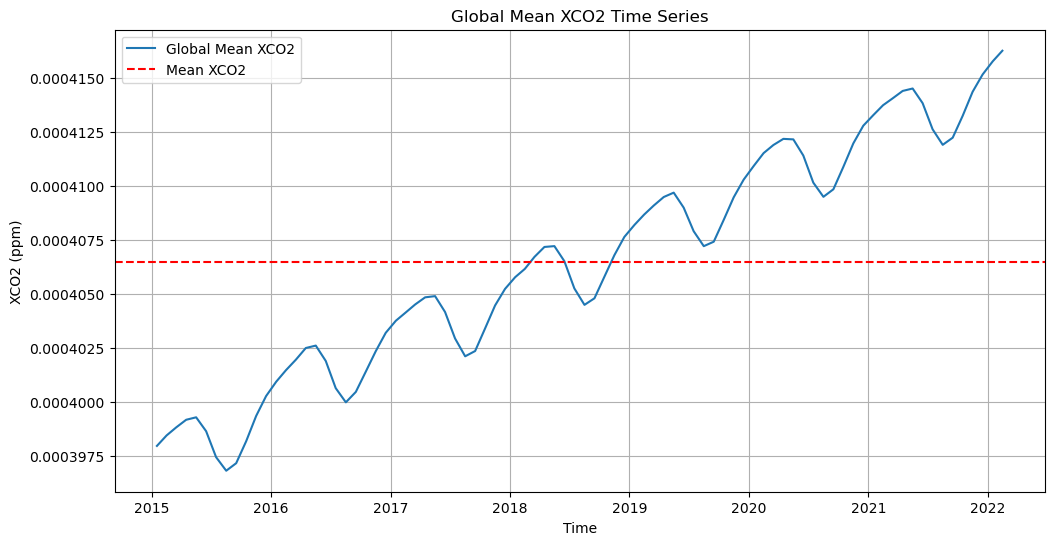

In [16]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import glob

# 指定文件夹路径
folder_path = 'D:\ESE5023\output_file'

# 获取所有.nc4文件的路径
files = glob.glob(f'{folder_path}/*.nc4')

# 使用xarray打开所有文件
ds = xr.open_mfdataset(files, combine='nested', concat_dim='time')

# 3.1
# 选择变量 XCO2  
data = ds['XCO2']  

# 计算全球均值  
global_mean = data.mean(dim=('lat', 'lon'))  

# 绘制时间序列图，使用线性格式  
plt.figure(figsize=(12, 6))  
plt.plot(global_mean['time'], global_mean, color='tab:blue', label='Global Mean XCO2')  
plt.title('Global Mean XCO2 Time Series')  
plt.xlabel('Time')  
plt.ylabel('XCO2 (ppm)')  # 单位可以根据您的数据调整  
plt.axhline(global_mean.mean(), color='red', linestyle='--', label='Mean XCO2')  
plt.legend()  
plt.grid()  
plt.show() 

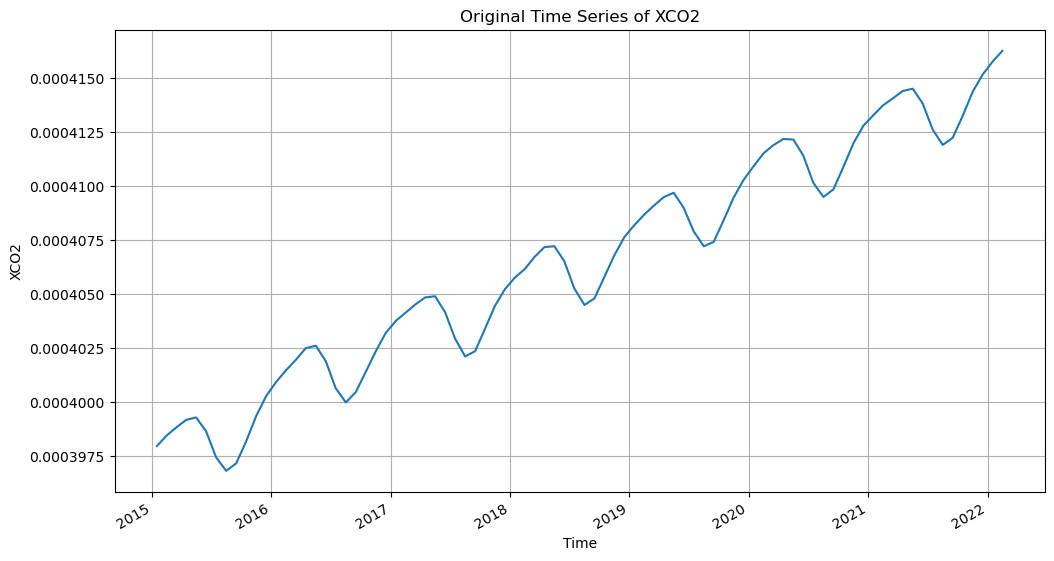

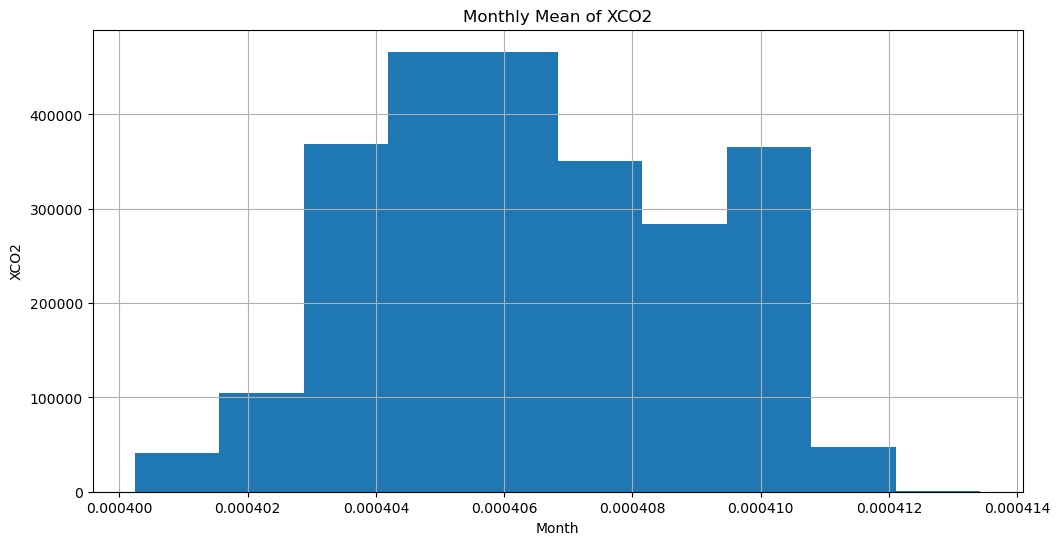

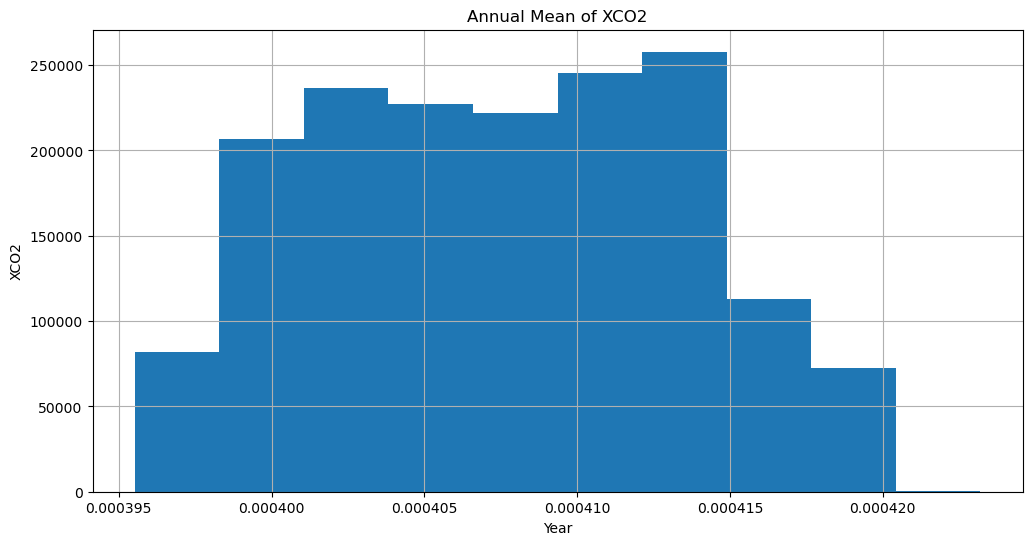

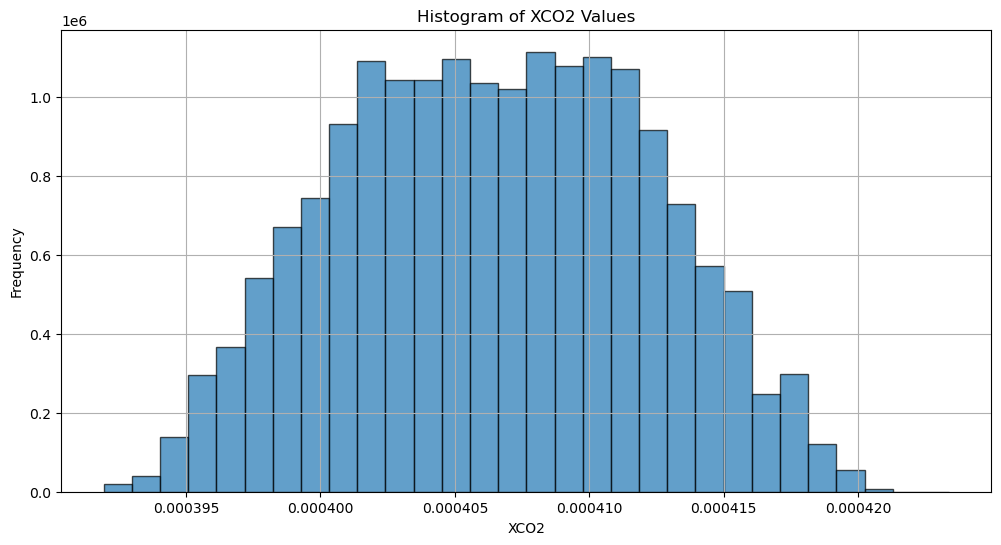

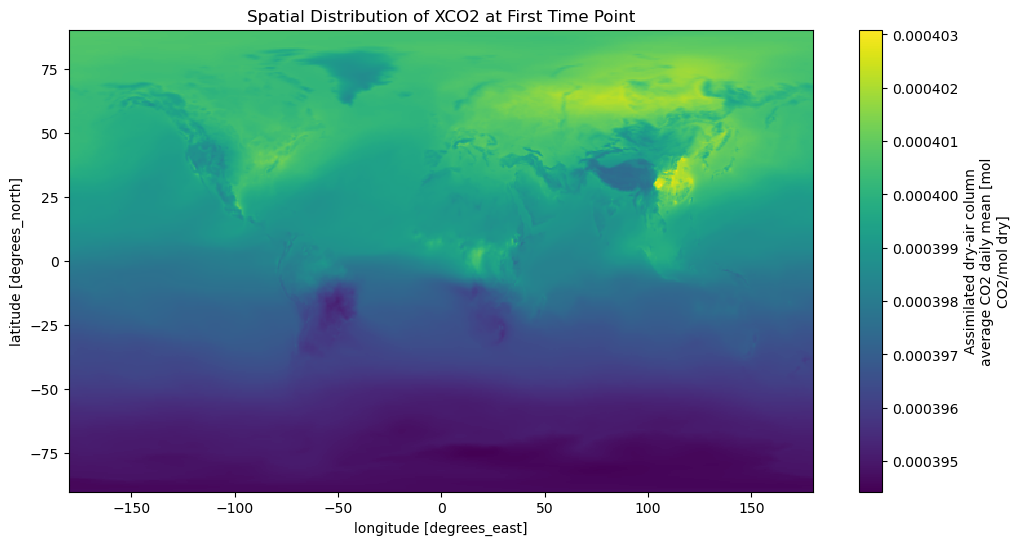

In [19]:
# 3.2
# 1. 原始时间序列图  
plt.figure(figsize=(12, 6))  
data.mean(dim=('lat', 'lon')).plot()  
plt.title('Original Time Series of XCO2')  
plt.xlabel('Time')  
plt.ylabel('XCO2')  
plt.grid()  
plt.show()  

# 2. 月均值图  
monthly_mean = data.groupby('time.month').mean('time')  
plt.figure(figsize=(12, 6))  
monthly_mean.plot()  
plt.title('Monthly Mean of XCO2')  
plt.xlabel('Month')  
plt.ylabel('XCO2')  
plt.grid()  
plt.show()  

# 3. 年均值图  
annual_mean = data.groupby('time.year').mean('time')  
plt.figure(figsize=(12, 6))  
annual_mean.plot()  
plt.title('Annual Mean of XCO2')  
plt.xlabel('Year')  
plt.ylabel('XCO2')  
plt.grid()  
plt.show()  

# 4. 时间序列的直方图  
plt.figure(figsize=(12, 6))  
plt.hist(data.values.flatten(), bins=30, edgecolor='k', alpha=0.7)  
plt.title('Histogram of XCO2 Values')  
plt.xlabel('XCO2')  
plt.ylabel('Frequency')  
plt.grid()  
plt.show()  

# 5. XCO2的空间分布图
plt.figure(figsize=(12, 6))  
data.isel(time=0).plot(cmap='viridis')  
plt.title('Spatial Distribution of XCO2 at First Time Point')  
plt.show()  